In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

/var/folders/hv/b1wcvr5j7bb1mzjm00fwl5zm0000gn/T/ipykernel_87627/824567906.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# plotting features of iris's to view linear seperability

def plot_features(feature_1, feature_2, iris_1, iris_2, iris_1_arr, iris_2_arr):
    ax1 = iris_1_arr.plot.scatter(x=feature_1,
                              y=feature_2,
                              c='DarkBlue', label=iris_1)
    
    ax2 = iris_2_arr.plot.scatter(x=feature_1,
                              y=feature_2,
                              c='Orange', label=iris_2,
                              ax=ax1)
    ax1.set_xlabel(feature_1)
    ax1.set_ylabel(feature_2)
    ax1.set_title('Scatter Plot of ' + iris_1 +' and ' + iris_2)
    ax1.legend()
    plt.show()

In [3]:
# plotting decision regions function

def plot_decision_regions(X, y, classifier, x_label, y_label, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend(loc='upper left')
    plt.show()

In [4]:
class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.
        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [5]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.


    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    cost_ : list
      Sum-of-squares cost function value in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


In [6]:
# find optimal learning rate

def optimal_learning_rate(learning_rates, iter, X, y):
    for eta in learning_rates:
        ada1 = AdalineGD(n_iter=iter, eta=eta).fit(X, y)
        
        # Plot the cost over epochs
        plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
    
        plt.xlabel('Epochs')
        plt.ylabel('Sum-squared-error')
        plt.title('Adaline - Learning rate ' + str(eta))
        plt.show()

In [7]:
# find optimal number of iterations

def optimal_num_iters(n_iter, learning_rate, X, y):
    for iter in n_iter:
        ada1 = AdalineGD(n_iter=iter, eta=learning_rate).fit(X, y)
        
        # Plot the cost over epochs
        plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')
    
        plt.xlabel('Epochs')
        plt.ylabel('Sum-squared-error')
        plt.title('Adaline - # iters = ' + str(iter))
        plt.show()

In [8]:
# standardize X

def standardize_data(X):
    X_std = np.copy(X)
    X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
    X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    return X_std

In [9]:
# read in iris dataset
    # iris types:
        # setosa
        # versicolor
        # virginica
    # features
        # sepal length
        # sepal width
        # petal length
        # petal width

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(s, header=None, encoding='utf-8')
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
# pick 2 species of iris & 2 features that are linearly seperable
    # setosa
    # virginica
    # sepal length [0]
    # petal length [2]
setosa = df.loc[df[4]=='Iris-setosa']
X_1 = (setosa[[0, 2]]).rename(columns={0: "Sepal Length", 2: "Petal Length"})
y_1 = np.where(setosa[4] == 'Iris-setosa', 1, -1)

virginica = df.loc[df[4]=='Iris-virginica']
X_2 = (virginica[[0, 2]]).rename(columns={0: "Sepal Length", 2: "Petal Length"})
y_2 = np.where(virginica[4] == 'Iris-setosa', 1, -1)

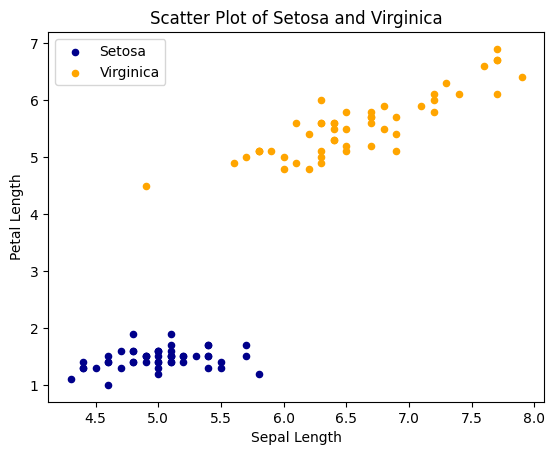

In [11]:
# showing my features are linearly separable
plot_features('Sepal Length', 'Petal Length', 'Setosa', 'Virginica', X_1, X_2)

In [12]:
# create full X and y to train perceptron on

# make X into array
X = pd.concat([X_1,X_2]).values
y = np.append(y_1, y_2)

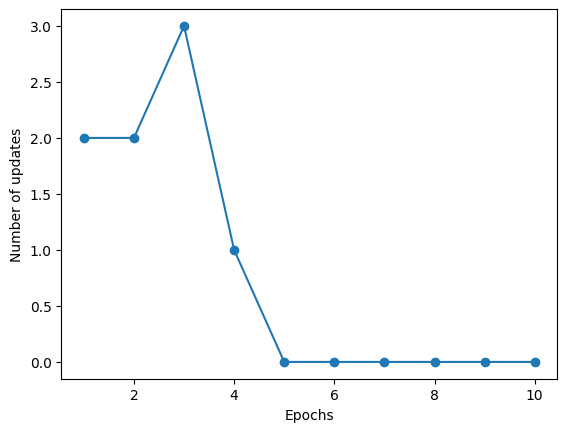

/var/folders/hv/b1wcvr5j7bb1mzjm00fwl5zm0000gn/T/ipykernel_87627/2051005356.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


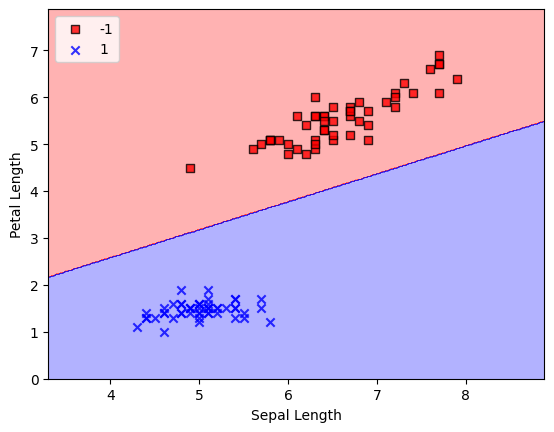

In [13]:
# create and train Perceptron, plot results

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

plot_decision_regions(X, y, ppn, 'Sepal Length', 'Petal Length')

In [14]:
# standardize data
    # scaling features improves gradient descent
    # Adaline uses gradient descent to find the weights which minimize the cost function

X_std = standardize_data(X)

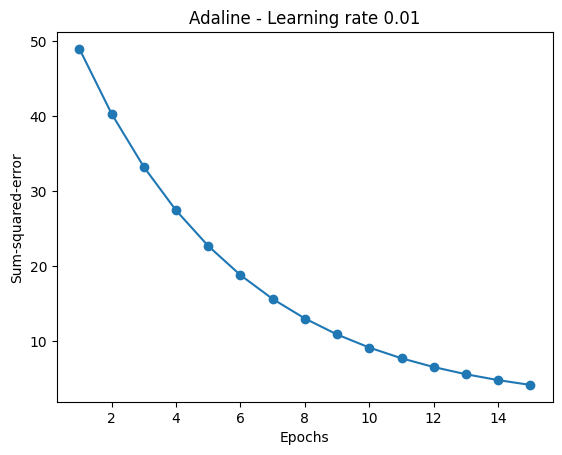

In [15]:
# find a good learning rate

ada1 = AdalineGD(n_iter=15, eta=0.01).fit(X_std, y)
plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.01')

plt.show()

/var/folders/hv/b1wcvr5j7bb1mzjm00fwl5zm0000gn/T/ipykernel_87627/2051005356.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


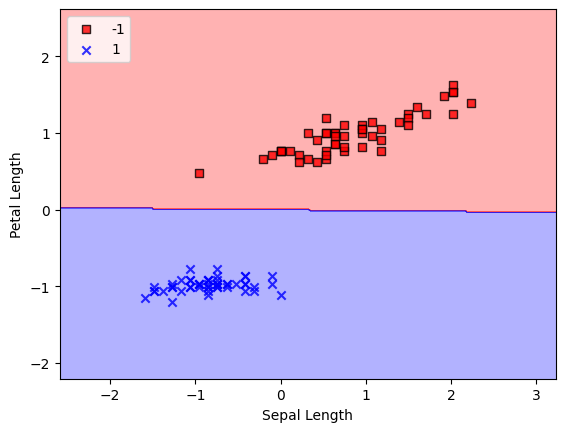

In [16]:
# create and train Adaline, plot results

ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, ada_gd, 'Sepal Length', 'Petal Length')

In [17]:
# pick 2 species of iris & 3 features that are linearly seperable
    # setosa
    # virginica
    # sepal length [0]
    # sepal width [1]
    # petal length [2]
setosa = df.loc[df[4]=='Iris-setosa']
X_1 = (setosa[[0, 1, 2]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length"})
y_1 = np.where(setosa[4] == 'Iris-setosa', 1, -1)

virginica = df.loc[df[4]=='Iris-virginica']
X_2 = (virginica[[0, 1, 2]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length"})
y_2 = np.where(virginica[4] == 'Iris-setosa', 1, -1)

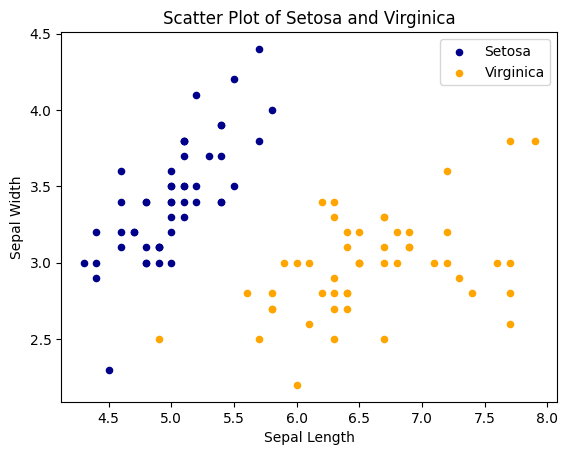

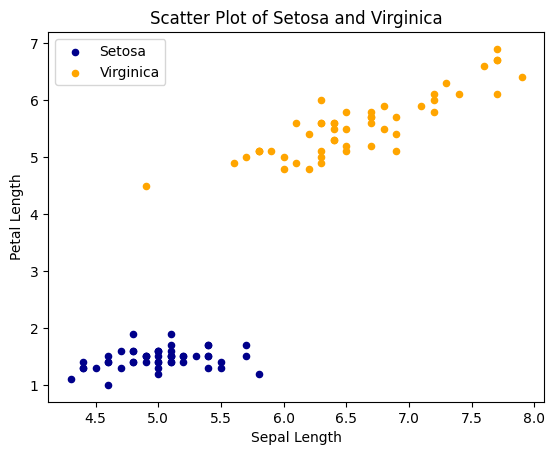

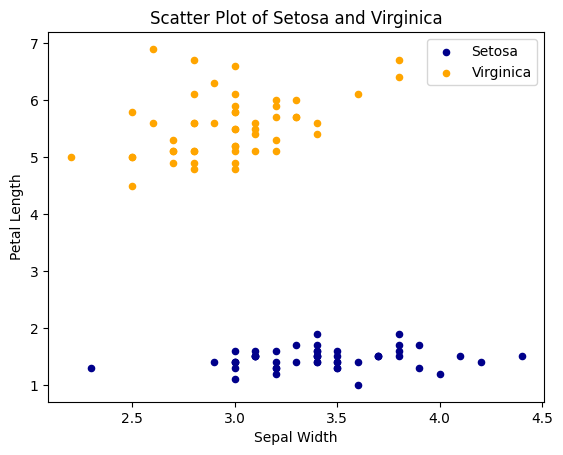

In [18]:
# showing my features are linearly separable
plot_features('Sepal Length', 'Sepal Width', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Sepal Length', 'Petal Length', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Sepal Width', 'Petal Length', 'Setosa', 'Virginica', X_1, X_2)

In [19]:
# create full X and y to train perceptron on

# make X into array
X = pd.concat([X_1,X_2]).values
y = np.append(y_1, y_2)

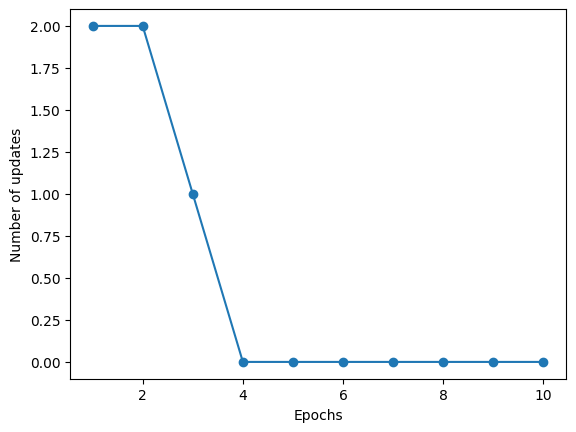

In [20]:
# create and train Perceptron, plot results

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [21]:
# standardize data

X_std = standardize_data(X)

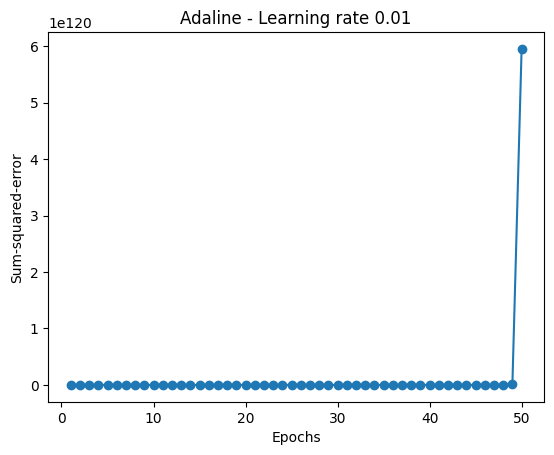

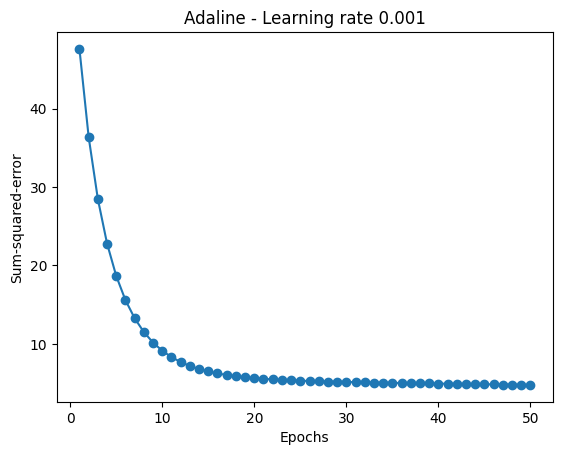

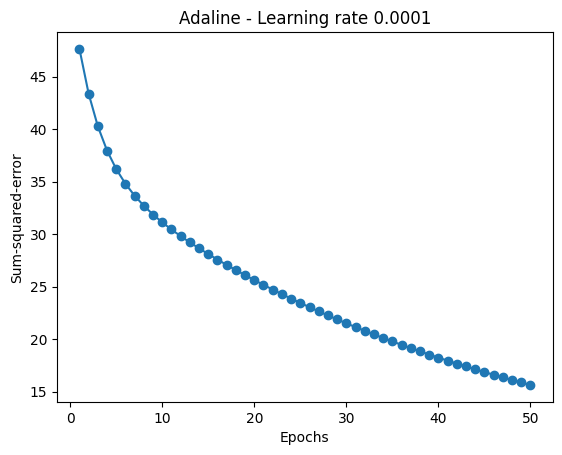

In [22]:
# find a good learning rate

learning_rates = [0.01, 0.001, 0.0001]

optimal_learning_rate(learning_rates, 50, X_std, y)

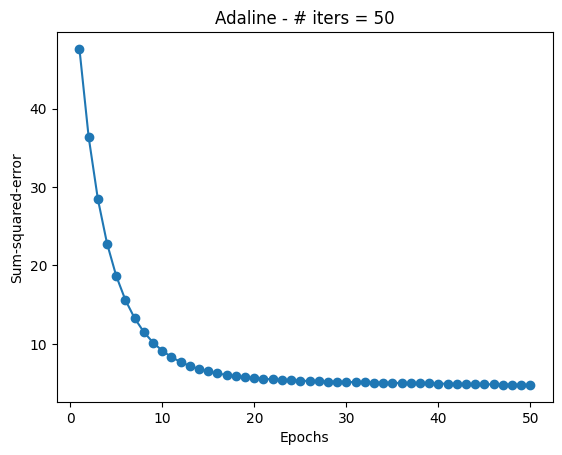

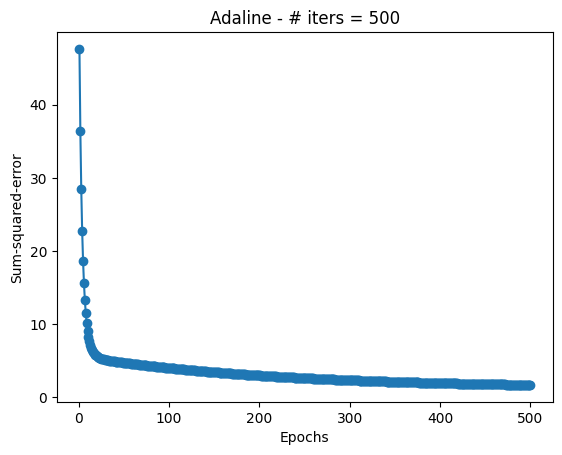

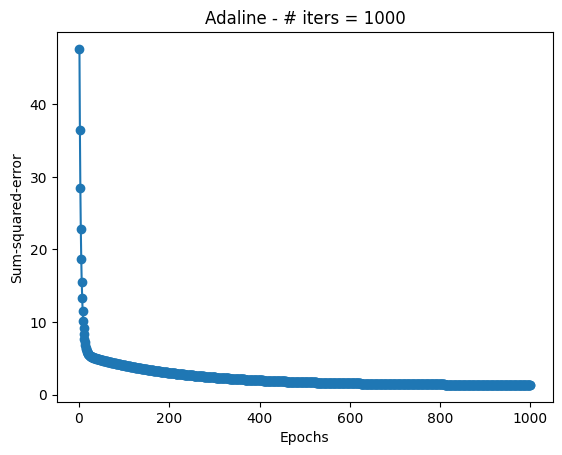

In [23]:
# find a good number of iterations

n_iter = [50, 500, 1000]

optimal_num_iters(n_iter, .001, X_std, y)

In [24]:
# create and train Adaline, plot results

ada_gd = AdalineGD(n_iter=500, eta=0.001)
ada_gd.fit(X_std, y)

In [25]:
# pick 2 species of iris & 4 features that are linearly seperable
    # setosa
    # virginica
    # sepal length [0]
    # sepal width [1]
    # petal length [2]
    # petal width [4]
setosa = df.loc[df[4]=='Iris-setosa']
X_1 = (setosa[[0, 1, 2, 3]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length", 3: "Petal Width"})
y_1 = np.where(setosa[4] == 'Iris-setosa', 1, -1)

virginica = df.loc[df[4]=='Iris-virginica']
X_2 = (virginica[[0, 1, 2, 3]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length", 3: "Petal Width"})
y_2 = np.where(virginica[4] == 'Iris-setosa', 1, -1)

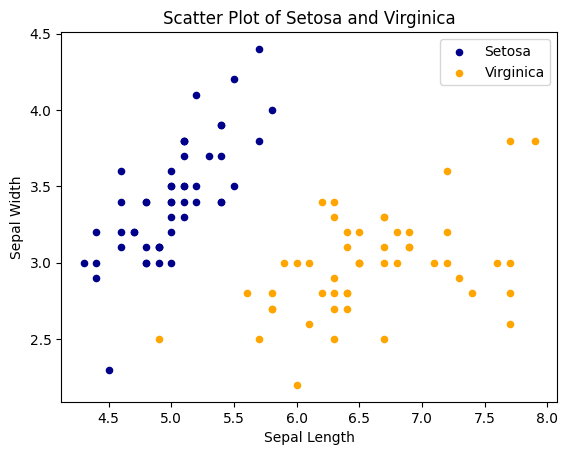

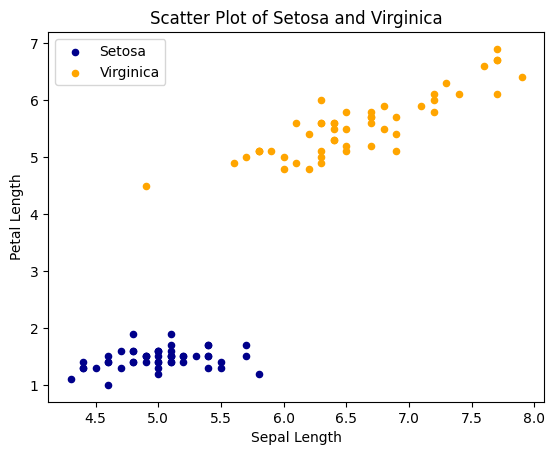

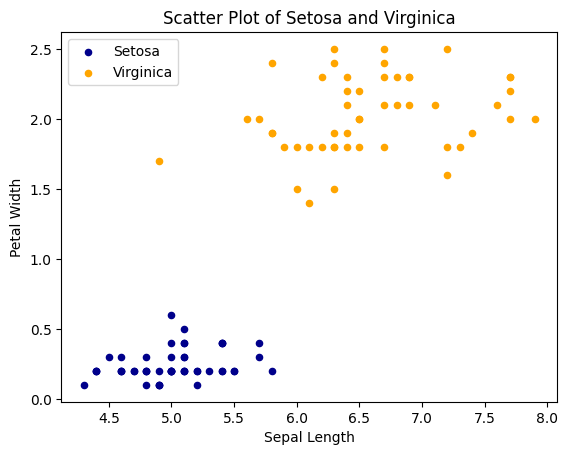

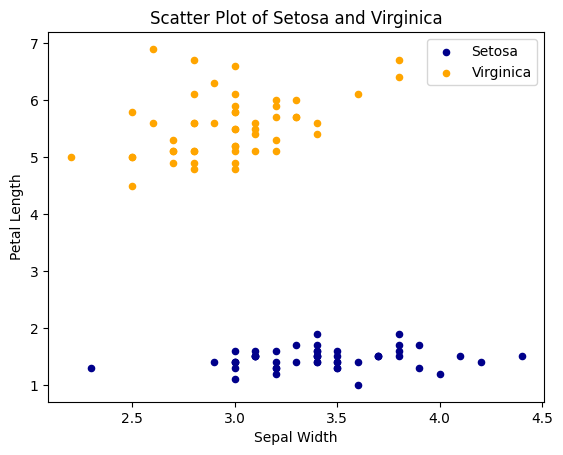

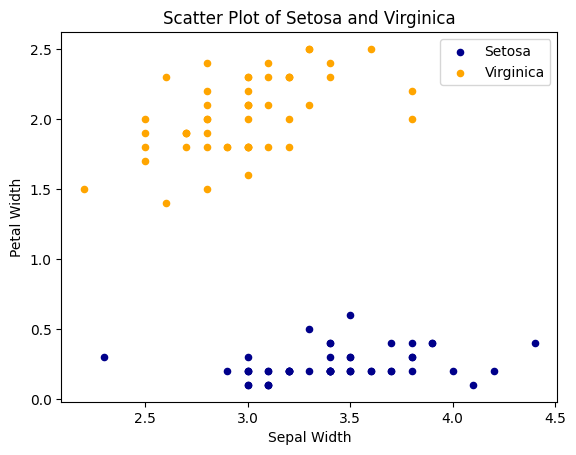

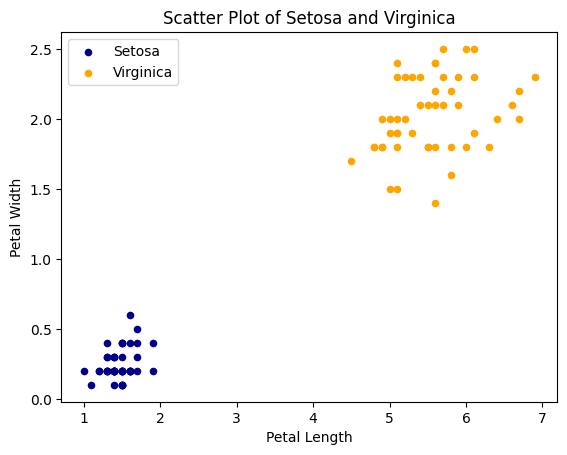

In [26]:
# showing my features are linearly separable
plot_features('Sepal Length', 'Sepal Width', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Sepal Length', 'Petal Length', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Sepal Length', 'Petal Width', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Sepal Width', 'Petal Length', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Sepal Width', 'Petal Width', 'Setosa', 'Virginica', X_1, X_2)
plot_features('Petal Length', 'Petal Width', 'Setosa', 'Virginica', X_1, X_2)

In [27]:
# create full X and y to train perceptron on

# make X into array
X = pd.concat([X_1,X_2]).values
y = np.append(y_1, y_2)

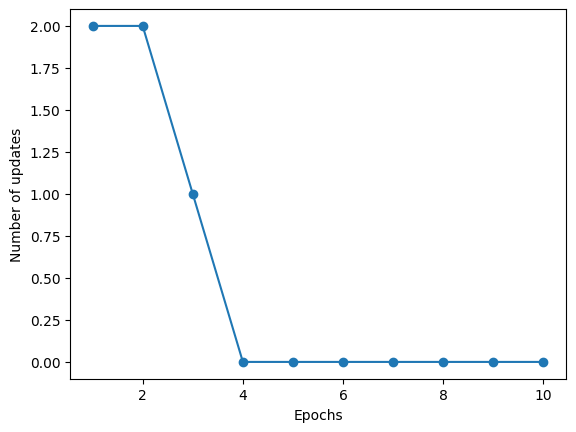

In [28]:
# create and train Perceptron, plot results

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [29]:
# standardize data

X_std = standardize_data(X)

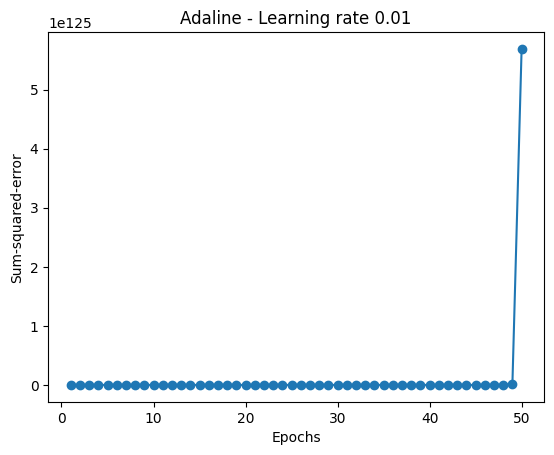

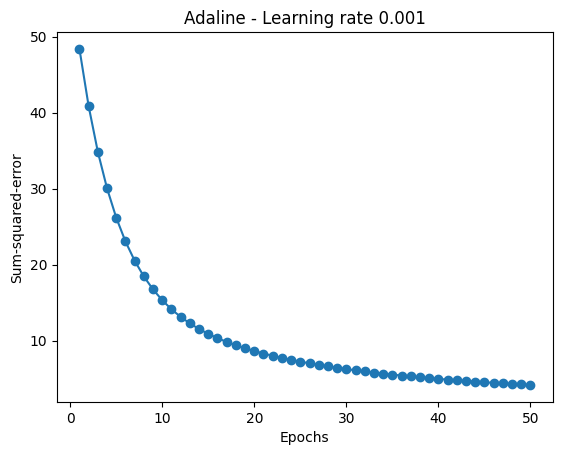

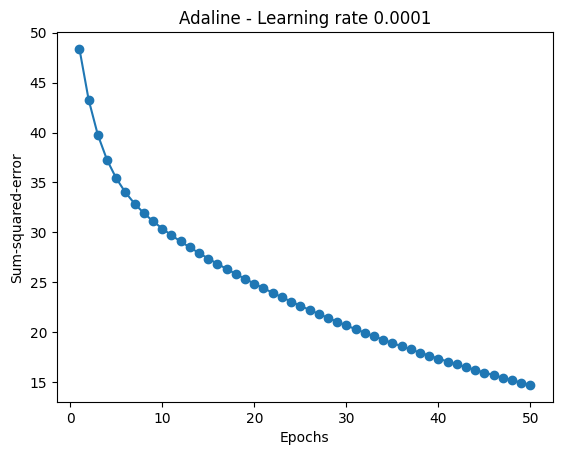

In [30]:
# find a good learning rate

learning_rates = [0.01, 0.001, 0.0001]

optimal_learning_rate(learning_rates, 50, X_std, y)

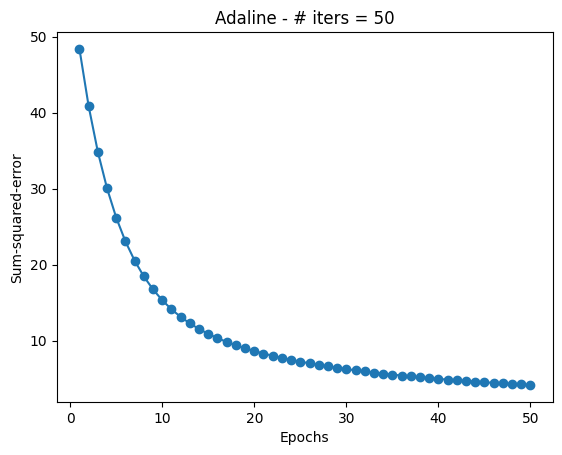

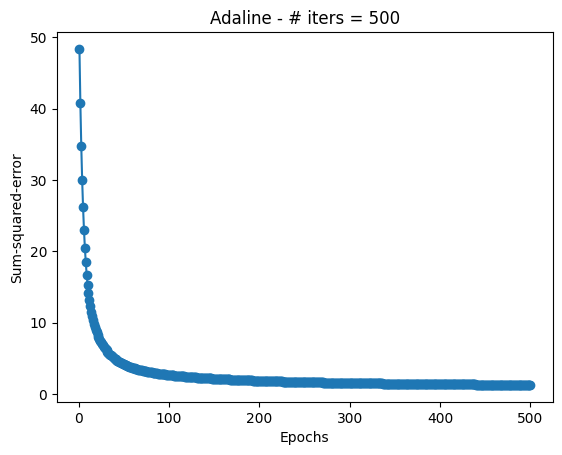

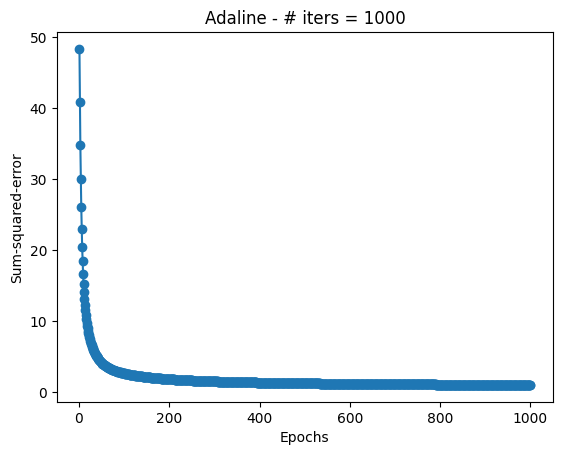

In [31]:
# find a good number of iterations

n_iter = [50, 500, 1000]

optimal_num_iters(n_iter, .001, X_std, y)

In [32]:
# create and train Adaline, plot results

ada_gd = AdalineGD(n_iter=500, eta=0.001)
ada_gd.fit(X_std, y)

In [33]:
# pick 2 species of iris & 2 features that aren't linearly seperable
    # versicolor
    # virginica
    # sepal width [1]
    # petal length [2]
versicolor = df.loc[df[4]=='Iris-versicolor']
X_1 = (versicolor[[1, 2]]).rename(columns={1: "Sepal Width", 2: "Petal Length"})
y_1 = np.where(versicolor[4] == 'Iris-versicolor', 1, -1)

virginica = df.loc[df[4]=='Iris-virginica']
X_2 = (virginica[[1, 2]]).rename(columns={1: "Sepal Width", 2: "Petal Length"})
y_2 = np.where(virginica[4] == 'Iris-versicolor', 1, -1)

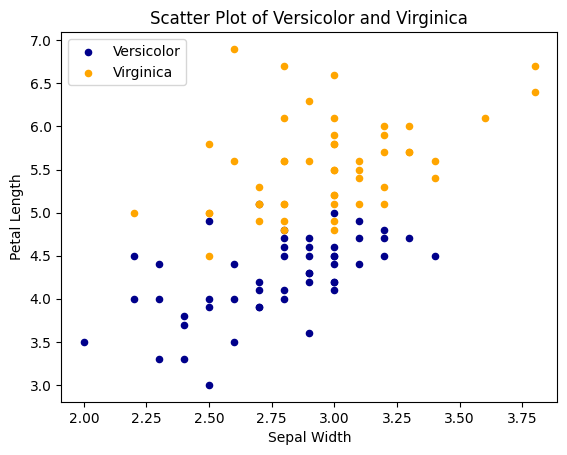

In [34]:
# showing my features aren't linearly separable
plot_features('Sepal Width', 'Petal Length', 'Versicolor', 'Virginica', X_1, X_2)

In [35]:
# create full X and y to train perceptron on

# make X into array
X = pd.concat([X_1,X_2]).values
y = np.append(y_1, y_2)

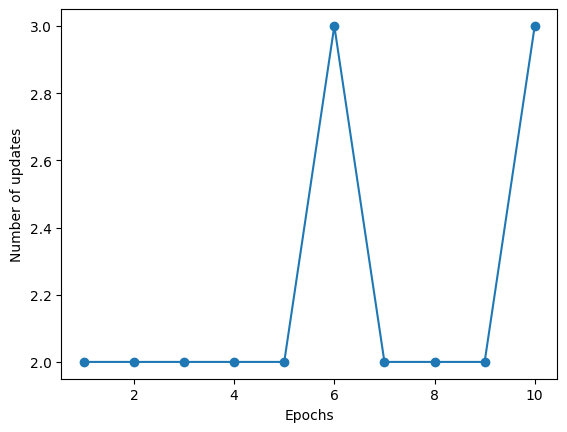

/var/folders/hv/b1wcvr5j7bb1mzjm00fwl5zm0000gn/T/ipykernel_87627/2051005356.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


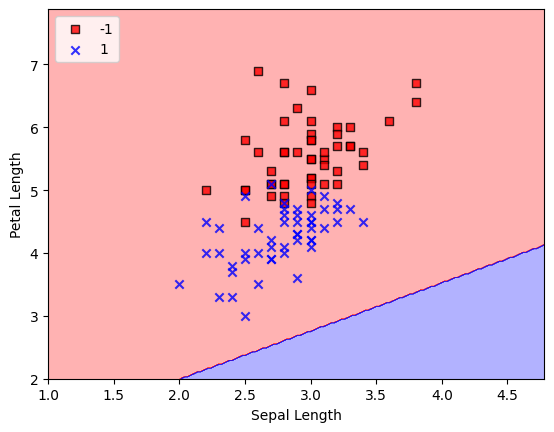

In [36]:
# create and train Perceptron, plot results

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

plot_decision_regions(X, y, ppn, 'Sepal Length', 'Petal Length')

In [37]:
# standardize data
    # scaling features improves gradient descent
    # Adaline uses gradient descent to find the weights which minimize the cost function

X_std = standardize_data(X)

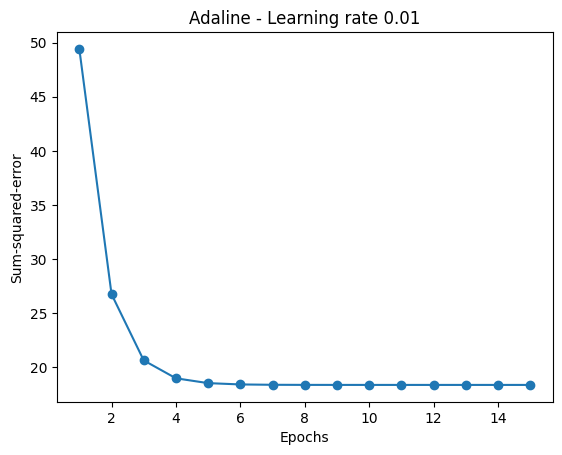

In [38]:
# find a good learning rate

ada1 = AdalineGD(n_iter=15, eta=0.01).fit(X_std, y)
plt.plot(range(1, len(ada1.cost_) + 1), ada1.cost_, marker='o')

plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.01')

plt.show()

/var/folders/hv/b1wcvr5j7bb1mzjm00fwl5zm0000gn/T/ipykernel_87627/2051005356.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


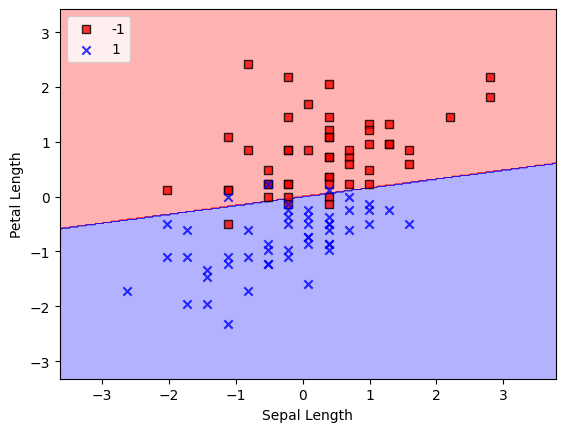

In [39]:
# create and train Adaline, plot results

ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, ada_gd, 'Sepal Length', 'Petal Length')

In [40]:
# pick 2 species of iris & 3 features that aren't linearly seperable
    # versicolor
    # virginica
    # sepal length [0]
    # sepal width [1]
    # petal length [2]
versicolor = df.loc[df[4]=='Iris-versicolor']
X_1 = (versicolor[[0, 1, 2]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length"})
y_1 = np.where(versicolor[4] == 'Iris-versicolor', 1, -1)

virginica = df.loc[df[4]=='Iris-virginica']
X_2 = (virginica[[0, 1, 2]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length"})
y_2 = np.where(virginica[4] == 'Iris-versicolor', 1, -1)

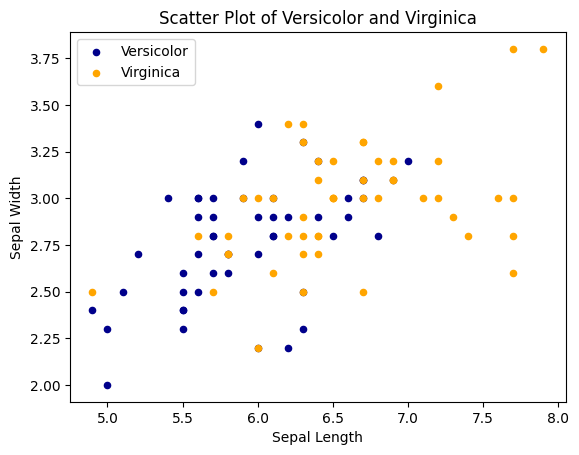

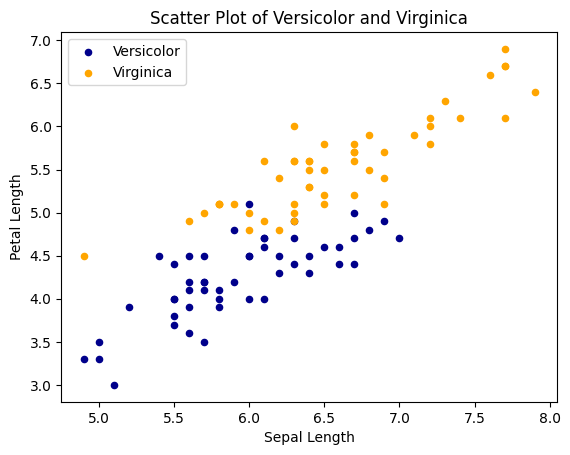

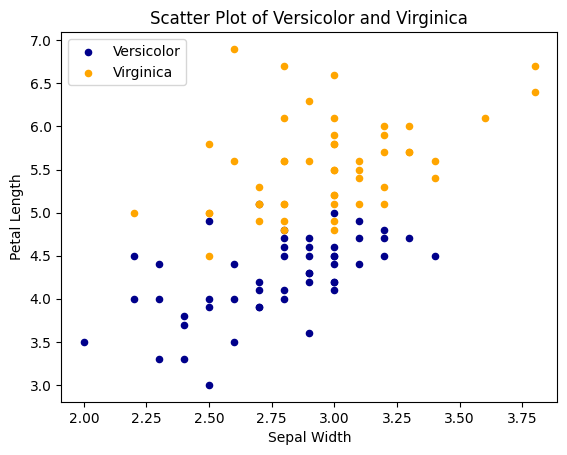

In [41]:
# showing my features are linearly separable
plot_features('Sepal Length', 'Sepal Width', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Sepal Length', 'Petal Length', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Sepal Width', 'Petal Length', 'Versicolor', 'Virginica', X_1, X_2)

In [42]:
# create full X and y to train perceptron on

# make X into array
X = pd.concat([X_1,X_2]).values
y = np.append(y_1, y_2)

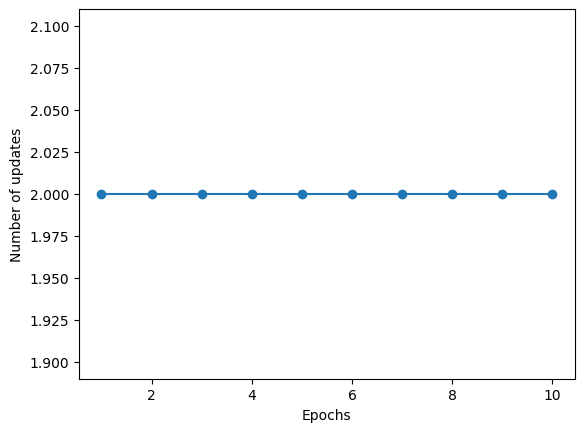

In [43]:
# create and train Perceptron, plot results

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [44]:
# standardize data

X_std = standardize_data(X)

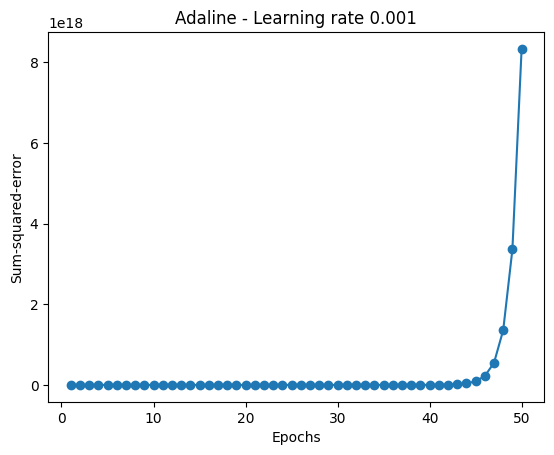

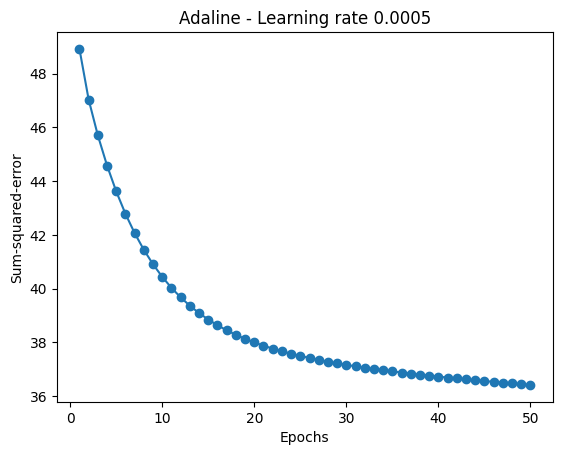

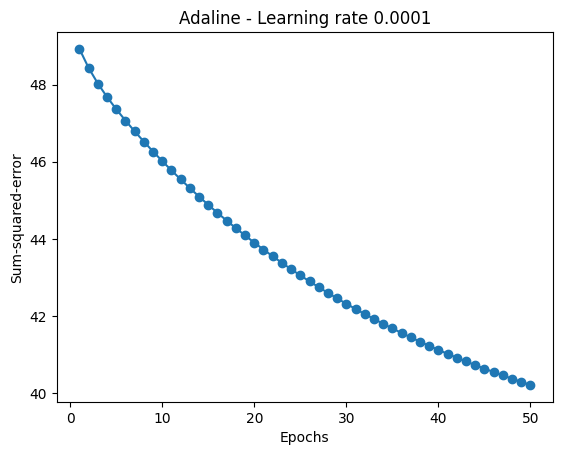

In [45]:
# find a good learning rate

learning_rates = [0.001, 0.0005, 0.0001]

optimal_learning_rate(learning_rates, 50, X_std, y)

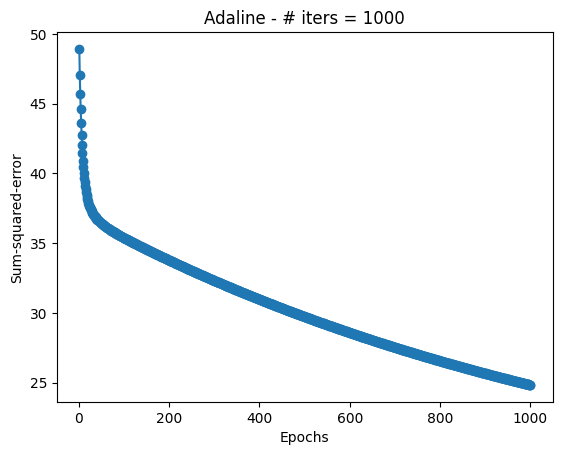

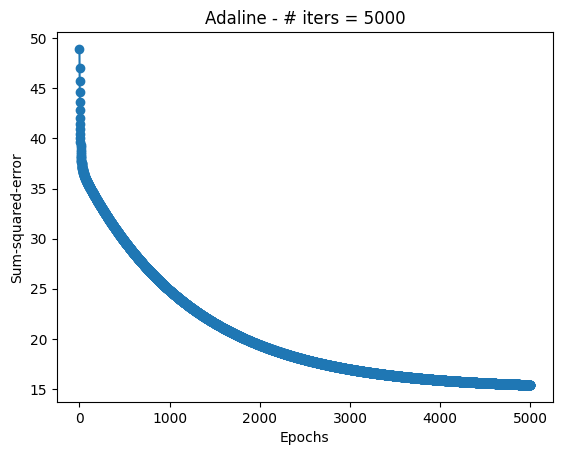

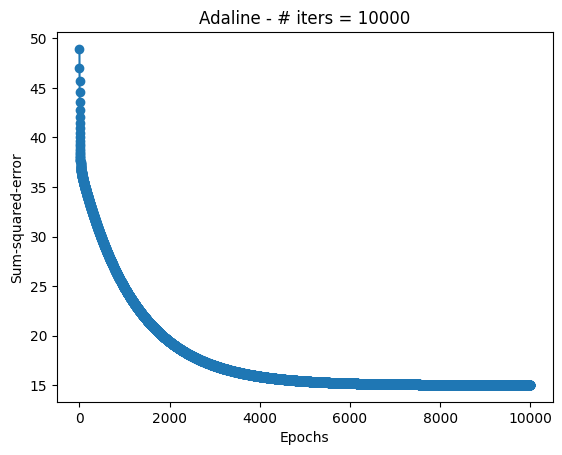

In [46]:
# find a good number of iterations

n_iter = [1000, 5000, 10000]

optimal_num_iters(n_iter, .0005, X_std, y)

In [47]:
# create and train Adaline, plot results

ada_gd = AdalineGD(n_iter=5000, eta=0.0005)
ada_gd.fit(X_std, y)

In [48]:
# pick 2 species of iris & 4 features that aren't linearly seperable
    # versicolor
    # virginica
    # sepal length [0]
    # sepal width [1]
    # petal length [2]
    # petal width [4]
versicolor = df.loc[df[4]=='Iris-versicolor']
X_1 = (versicolor[[0, 1, 2, 3]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length", 3: "Petal Width"})
y_1 = np.where(versicolor[4] == 'Iris-versicolor', 1, -1)

virginica = df.loc[df[4]=='Iris-virginica']
X_2 = (virginica[[0, 1, 2, 3]]).rename(columns={0: "Sepal Length", 1: "Sepal Width", 2: "Petal Length", 3: "Petal Width"})
y_2 = np.where(virginica[4] == 'Iris-versicolor', 1, -1)

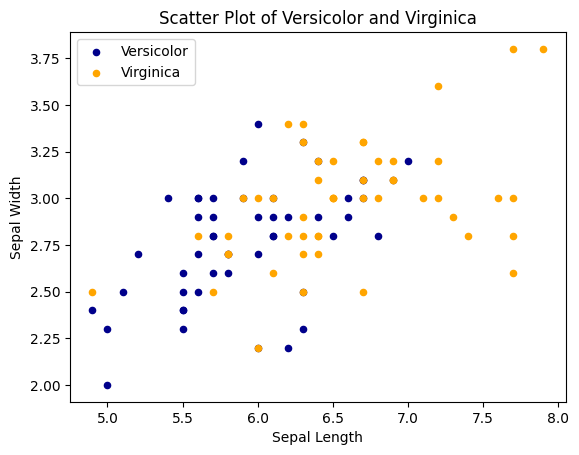

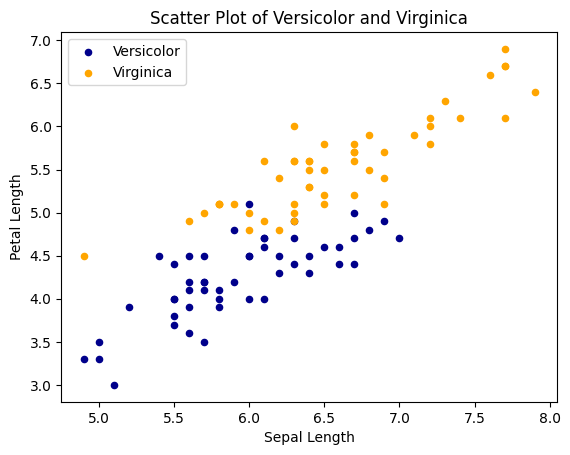

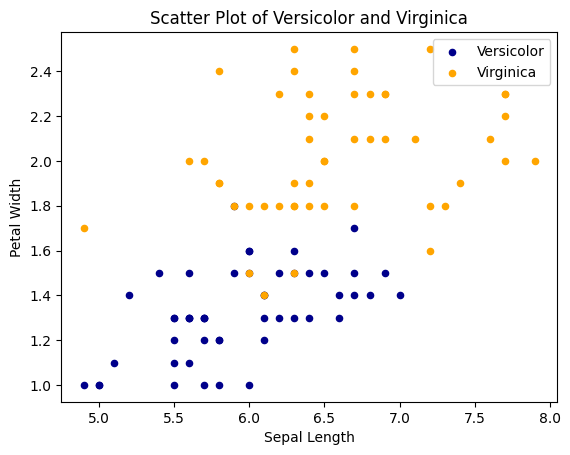

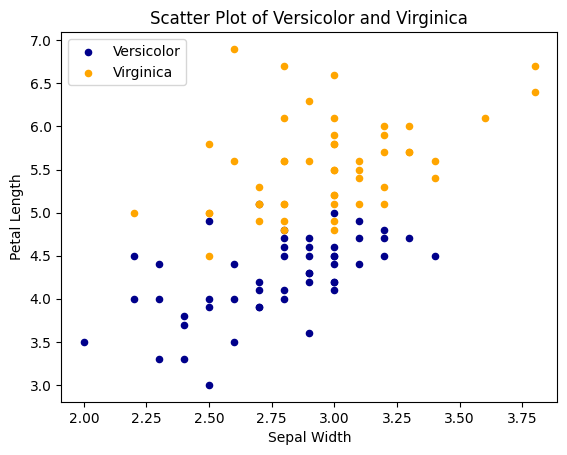

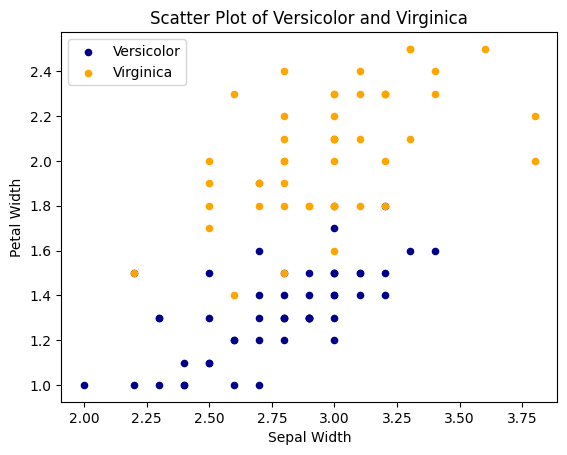

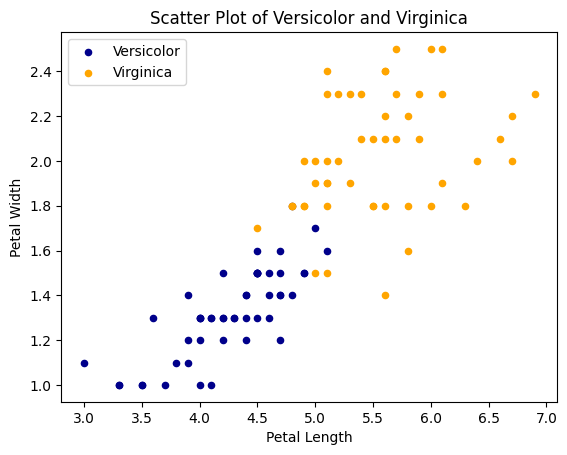

In [49]:
# showing my features are linearly separable
plot_features('Sepal Length', 'Sepal Width', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Sepal Length', 'Petal Length', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Sepal Length', 'Petal Width', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Sepal Width', 'Petal Length', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Sepal Width', 'Petal Width', 'Versicolor', 'Virginica', X_1, X_2)
plot_features('Petal Length', 'Petal Width', 'Versicolor', 'Virginica', X_1, X_2)

In [50]:
# create full X and y to train perceptron on

# make X into array
X = pd.concat([X_1,X_2]).values
y = np.append(y_1, y_2)

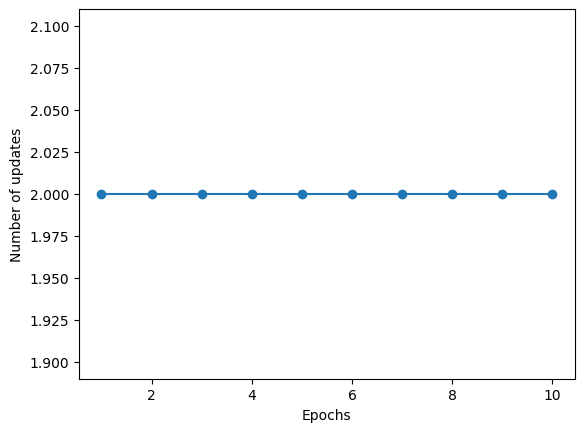

In [51]:
# create and train Perceptron, plot results

ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [52]:
# standardize data

X_std = standardize_data(X)

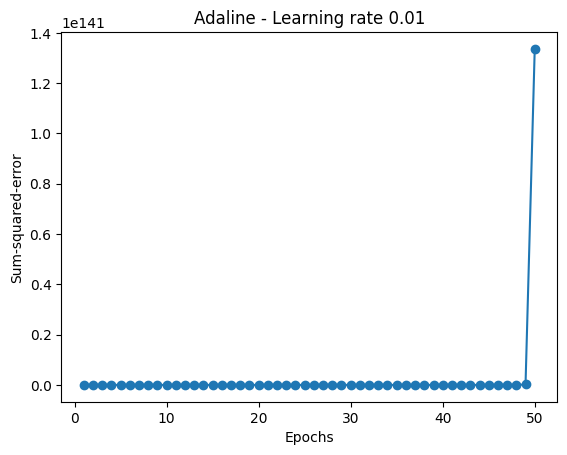

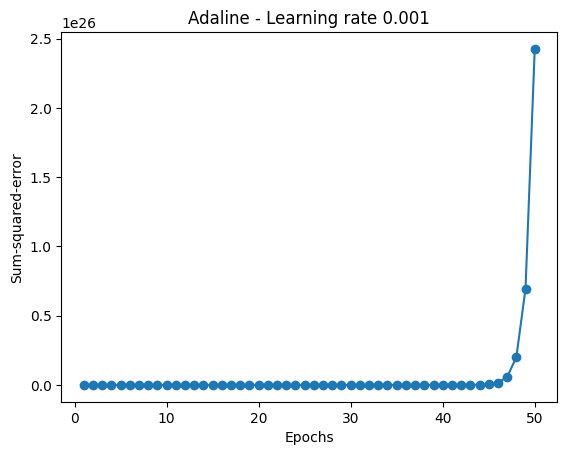

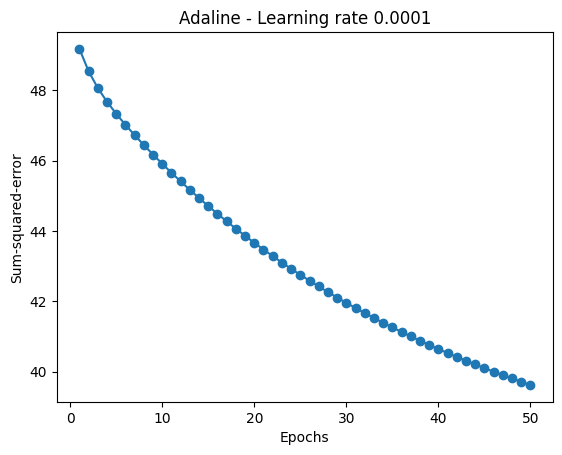

In [53]:
# find a good learning rate

learning_rates = [0.01, 0.001, 0.0001]

optimal_learning_rate(learning_rates, 50, X_std, y)

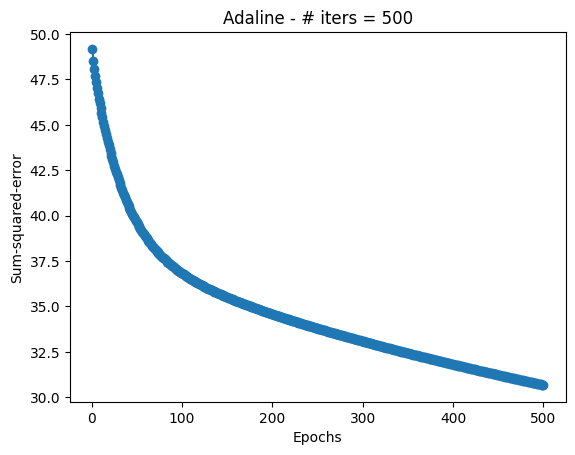

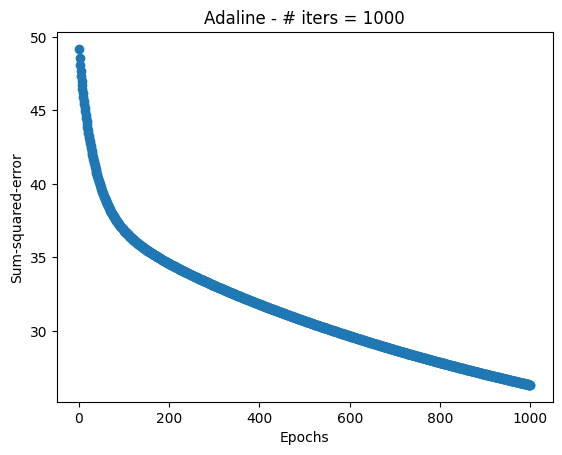

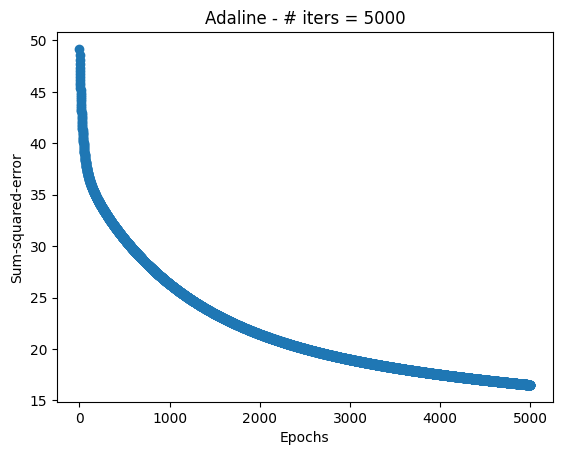

In [54]:
# find a good number of iterations

n_iter = [500, 1000, 5000]

optimal_num_iters(n_iter, .0001, X_std, y)

In [55]:
# create and train Adaline, plot results

ada_gd = AdalineGD(n_iter=500, eta=0.001)
ada_gd.fit(X_std, y)